# Trading Strategy 

Making and Testing Trading strategy for Nifty opening prices using the data we processed and from the model we made while [EDA](./EDA.ipynb)

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [2]:
prices = pd.read_csv('./Indices/Opening_Difference.csv',index_col=0)
prices

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2008-01-15,-38.000000,-284.519532,-290.201171,-24.910156,-236.95996,-0.989990,-17.000000,0.380005,8.960010,17.550293
2008-01-16,-125.700196,-338.179687,-1597.820313,22.060059,163.71973,-21.830078,8.969971,-1.370011,-7.970019,-161.350098
2008-01-17,-74.899902,-200.350586,-426.029297,-178.120118,-300.69043,-58.479980,-34.469971,-2.429992,-24.629980,-127.049805
2008-01-18,0.000000,-18.879883,-457.910156,-31.629882,-9.75976,15.179931,-2.619995,0.449997,-27.135010,-30.200195
2008-01-21,-233.899902,123.929688,211.849609,-87.300293,-307.10938,-40.179931,-40.890015,-3.069993,-56.600000,-202.750000
...,...,...,...,...,...,...,...,...,...,...
2018-08-14,-25.300293,-64.500000,-18.458984,-227.450195,-74.00000,13.290039,-3.439941,0.019989,7.065039,12.100586
2018-08-16,74.400390,-72.250000,-1067.210938,97.879883,-111.50000,-0.120117,-7.580078,-0.549988,3.735059,15.450196
2018-08-17,-3.100097,332.369140,517.460938,-242.500000,79.28125,-20.929688,3.560058,0.479981,10.825000,40.000000


In [3]:
# Norprice = pd.DataFrame()

### Splitting the data 200 -> test 

In [4]:
Train = prices[:-200]
Test = prices[-200:]

In [5]:
Train.head()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2008-01-15,-38.000000,-284.519532,-290.201171,-24.910156,-236.95996,-0.989990,-17.000000,0.380005,8.960010,17.550293
2008-01-16,-125.700196,-338.179687,-1597.820313,22.060059,163.71973,-21.830078,8.969971,-1.370011,-7.970019,-161.350098
2008-01-17,-74.899902,-200.350586,-426.029297,-178.120118,-300.69043,-58.479980,-34.469971,-2.429992,-24.629980,-127.049805
2008-01-18,0.000000,-18.879883,-457.910156,-31.629882,-9.75976,15.179931,-2.619995,0.449997,-27.135010,-30.200195
2008-01-21,-233.899902,123.929688,211.849609,-87.300293,-307.10938,-40.179931,-40.890015,-3.069993,-56.600000,-202.750000


In [6]:
Test.tail()

,Aord,Nikkei,Hsi,Daxi,Dji,Nasdaq,Sp500,Spy,NIFTY_Previous,NIFTY
Date,,,,,,,,,,
2018-08-14,-25.300293,-64.50000,-18.458984,-227.450195,-74.00000,13.290039,-3.439941,0.019989,7.065039,12.100586
2018-08-16,74.400390,-72.25000,-1067.210938,97.879883,-111.50000,-0.120117,-7.580078,-0.549988,3.735059,15.450196
2018-08-17,-3.100097,332.36914,517.460938,-242.500000,79.28125,-20.929688,3.560058,0.479981,10.825000,40.000000
2018-08-20,13.199707,-46.11914,-114.791016,39.929687,255.83008,-40.310058,6.880127,0.429993,20.429980,64.949218
2018-08-21,9.300293,-156.53125,396.759766,20.950196,176.89844,47.729980,15.609864,1.740020,17.470020,74.100586


## Making Model

In [7]:
formula = 'NIFTY~Aord+Nikkei+Hsi+Daxi+Dji+Nasdaq+Sp500+Spy+NIFTY_Previous'
model = ols(formula=formula, data = Train).fit()

In [8]:
Train_res = pd.DataFrame(index=Train.index)
Train_res['NIFTY'] = Train["NIFTY"]
Train_res['Pre'] = model.predict(Train)
Train_res.corr()

,NIFTY,Pre
NIFTY,1.000000,0.552794
Pre,0.552794,1.000000


In [9]:
Test_res = pd.DataFrame(index=Test.index)
Test_res['NIFTY'] = Test['NIFTY']
Test_res['Pre'] = model.predict(Test)
Test_res.corr()

,NIFTY,Pre
NIFTY,1.000000,0.483805
Pre,0.483805,1.000000


## Signal Based strategy

### Train Data

In [10]:
Train_res['Share'] = [1 if sign > 0 else -1 for sign in Train_res['Pre']]
Train_res['Profit'] = Train_res['NIFTY'] * Train_res['Share']
Train_res

,NIFTY,Pre,Share,Profit
Date,,,,
2008-01-15,17.550293,0.053668,1,17.550293
2008-01-16,-161.350098,-163.674499,-1,161.350098
2008-01-17,-127.049805,-67.592298,-1,127.049805
2008-01-18,-30.200195,-42.955281,-1,30.200195
2008-01-21,-202.750000,-78.880481,-1,202.750000
...,...,...,...,...
2017-10-27,70.500000,46.969107,1,70.500000
2017-10-30,-8.450196,33.577450,1,-8.450196
2017-10-31,11.050782,-15.075154,-1,-11.050782


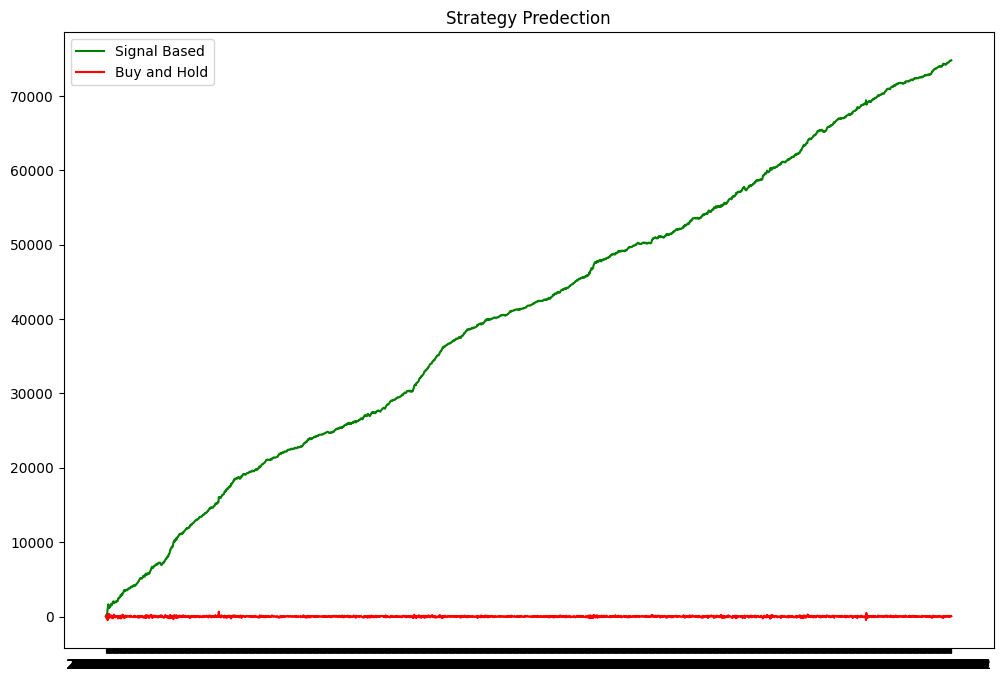

74800.19724500003

In [11]:
plt.figure(figsize=(12,8))
plt.title('Strategy Predection')
plt.plot(Train_res.index, Train_res['Profit'].cumsum(), c='g', label = 'Signal Based')
plt.plot(Train_res.index, Train_res['NIFTY'], c='r', label = 'Buy and Hold')
plt.legend()
plt.show()
Train_res['Profit'].sum()

### Test Data

In [12]:
Test_res['Share'] = [1 if sign > 0 else -1 for sign in Test_res['Pre']]
Test_res['Profit'] = Test_res['NIFTY'] * Test_res['Share']
Test_res

,NIFTY,Pre,Share,Profit
Date,,,,
2017-11-03,21.049805,7.464280,1,21.049805
2017-11-06,-29.799805,23.172631,1,-29.799805
2017-11-07,45.400391,41.160872,1,45.400391
2017-11-08,-115.200196,31.884588,1,-115.200196
2017-11-09,-3.299804,15.682850,1,-3.299804
...,...,...,...,...
2018-08-14,12.100586,11.472055,1,12.100586
2018-08-16,15.450196,-56.413412,-1,-15.450196
2018-08-17,40.000000,58.223130,1,40.000000


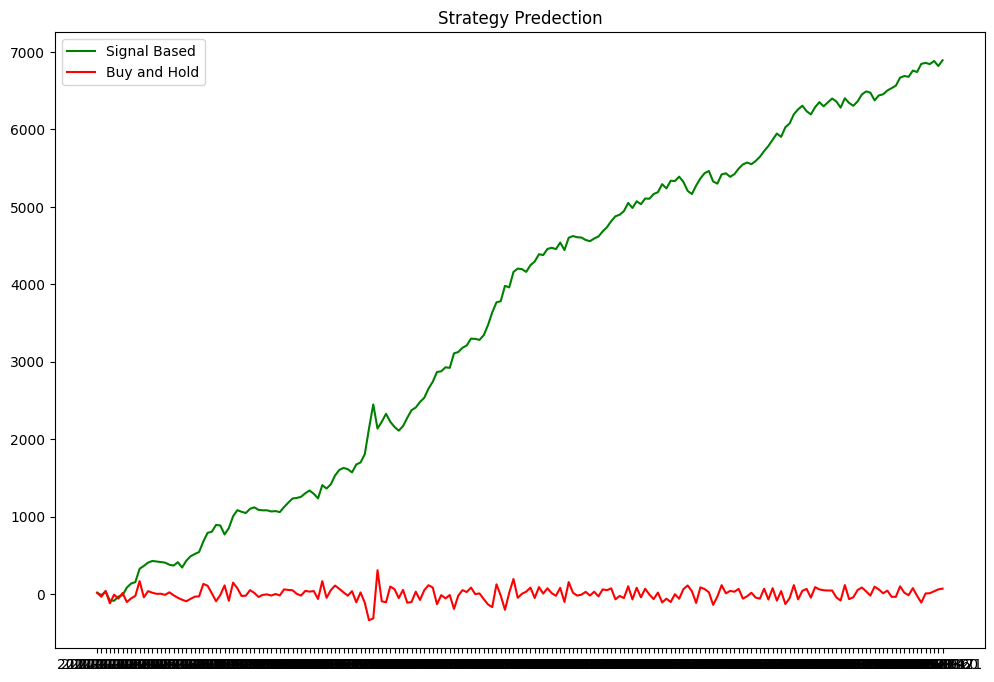

6893.10449299999

In [13]:
plt.figure(figsize=(12,8))
plt.title('Strategy Predection')
plt.plot(Test_res.index, Test_res['Profit'].cumsum(), c='g', label = 'Signal Based')
plt.plot(Test_res.index, Test_res['NIFTY'], c='r', label = 'Buy and Hold')
plt.legend()
plt.show()
Test_res['Profit'].sum()

## Moving Average Strategy


Fast Moving **Avg = 12 Days**<br>
Slow Moving **Avg = 50 Days**<br>

When Fast > Slow -> Time To Hold a share

In [14]:
Data = pd.read_csv('./Indices/NIFTY.csv',index_col=0)
Data['PriceDiff'] = Data['Open'] - Data['Close']
Data['Gap'] = Data['Close'] - Data['Open'].shift(1)
Data.head()


,Open,High,Low,Close,Adj Close,Volume,PriceDiff,Gap
Date,,,,,,,,
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0.0,-7.600098,NaN
2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0.0,-34.699707,42.649902
2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0.0,5.700195,33.849610
2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0.0,-95.199707,90.049805
2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0.0,-8.100098,100.000000


In [15]:
# Only Kepping NIFTY for the Analysis
Data = Data.drop(Data.columns[1:-2], axis = 1)
Data.rename(columns={'Open':'NIFTY'},inplace=True)
Data.head()

,NIFTY,PriceDiff,Gap
Date,,,
2008-01-01,6136.750000,-7.600098,NaN
2008-01-02,6144.700195,-34.699707,42.649902
2008-01-03,6184.250000,5.700195,33.849610
2008-01-04,6179.100098,-95.199707,90.049805
2008-01-07,6271.000000,-8.100098,100.000000


In [16]:
def mav(Data, days):
    Data[f'MA{days}'] = Data.NIFTY.rolling(days).mean()

In [17]:
mav(Data, 12)
mav(Data, 50)

Data.dropna(inplace=True)

Data.head()

,NIFTY,PriceDiff,Gap,MA12,MA50
Date,,,,,
2008-03-11,4796.299805,-69.600097,98.100097,5070.816569,5442.628965
2008-03-12,4869.750000,-2.250000,75.700195,5044.679077,5417.288965
2008-03-13,4868.700195,245.100097,-246.149902,5024.383260,5391.768965
2008-03-14,4623.799805,-122.000000,-122.900390,4976.299927,5360.559961
2008-03-17,4745.450195,242.350097,-120.699707,4932.470785,5331.886963


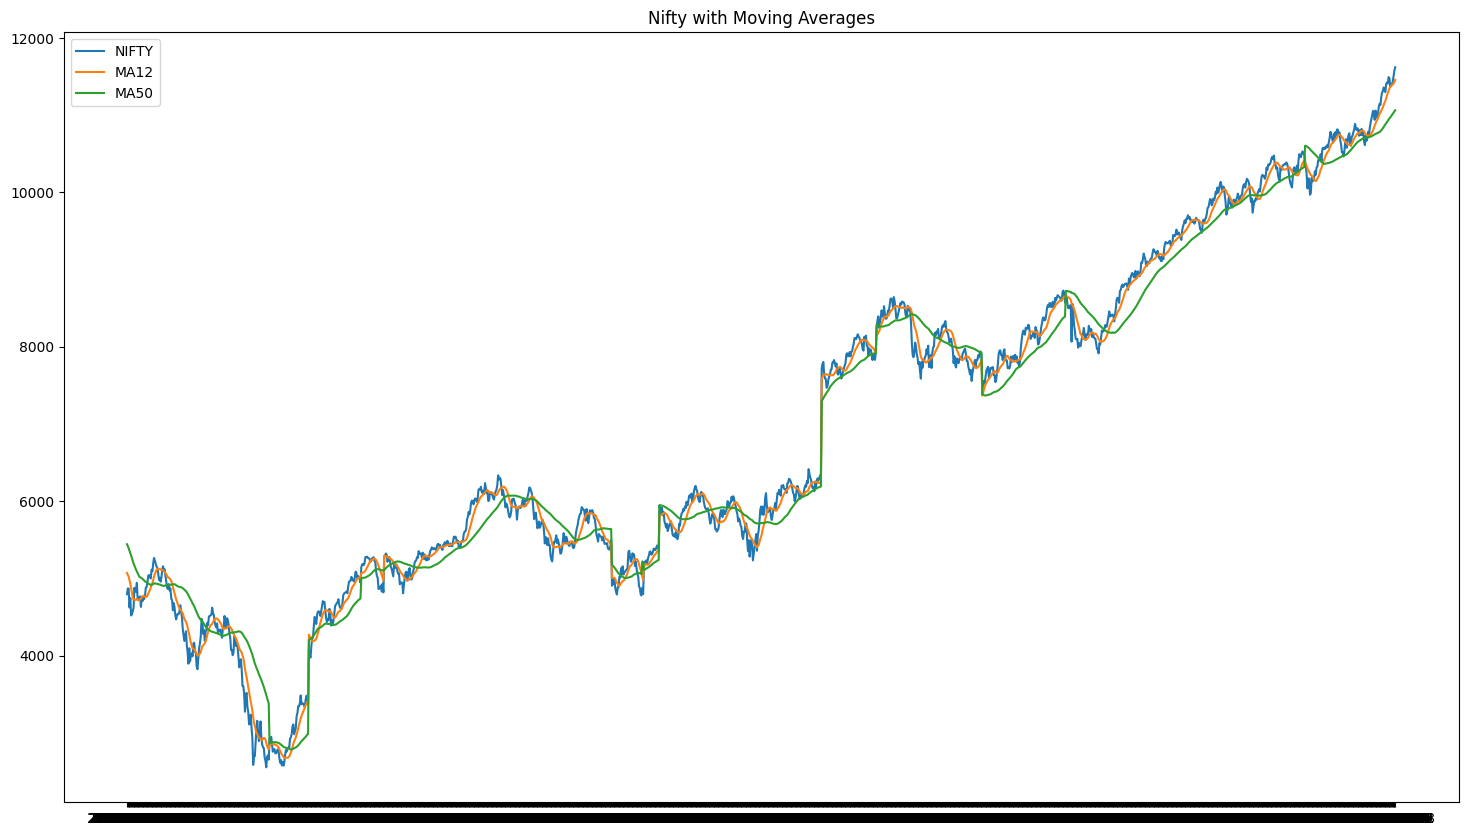

In [18]:
plt.figure(figsize=(18,10))
plt.title("Nifty with Moving Averages")
plt.plot(Data['NIFTY'], label = 'NIFTY')
plt.plot(Data['MA12'], label = 'MA12')
plt.plot(Data['MA50'], label = 'MA50')
plt.legend()
plt.show()

In [19]:
Data['Share'] = [1 if Data.loc[x,'MA12'] > Data.loc[x,'MA50'] else 0 for x in Data.index]
Data

,NIFTY,PriceDiff,Gap,MA12,MA50,Share
Date,,,,,,
2008-03-11,4796.299805,-69.600097,98.100097,5070.816569,5442.628965,0
2008-03-12,4869.750000,-2.250000,75.700195,5044.679077,5417.288965,0
2008-03-13,4868.700195,245.100097,-246.149902,5024.383260,5391.768965,0
2008-03-14,4623.799805,-122.000000,-122.900390,4976.299927,5360.559961,0
2008-03-17,4745.450195,242.350097,-120.699707,4932.470785,5331.886963,0
...,...,...,...,...,...,...
2018-08-16,11397.150391,12.100586,3.349610,11387.612549,11001.929082,1
2018-08-17,11437.150391,-33.599609,73.599609,11398.120931,11016.220098,1
2018-08-20,11502.099609,-49.650391,114.599609,11409.979248,11031.534082,1


In [20]:
Data['Profit'] = Data['Share'] * Data['PriceDiff']
Data['Profit'] = Data.Profit.cumsum()
Data.tail(10)

,NIFTY,PriceDiff,Gap,MA12,MA50,Share,Profit
Date,,,,,,,
2018-08-08,11412.500000,-37.500000,26.849609,11287.870931,10927.769082,1,5481.307111
2018-08-09,11493.250000,22.549805,58.200195,11319.891764,10944.232090,1,5503.856916
2018-08-10,11474.950195,45.450195,-63.750000,11347.104248,10958.962090,1,5549.307111
2018-08-13,11369.599609,13.849609,-119.200195,11366.825033,10971.035078,1,5563.156720
2018-08-14,11381.700195,-53.399414,65.500000,11379.237549,10986.055078,1,5509.757306
2018-08-16,11397.150391,12.100586,3.349610,11387.612549,11001.929082,1,5521.857892
2018-08-17,11437.150391,-33.599609,73.599609,11398.120931,11016.220098,1,5488.258283
2018-08-20,11502.099609,-49.650391,114.599609,11409.979248,11031.534082,1,5438.607892
2018-08-21,11576.200195,5.299804,68.800782,11430.587565,11047.421094,1,5443.907696


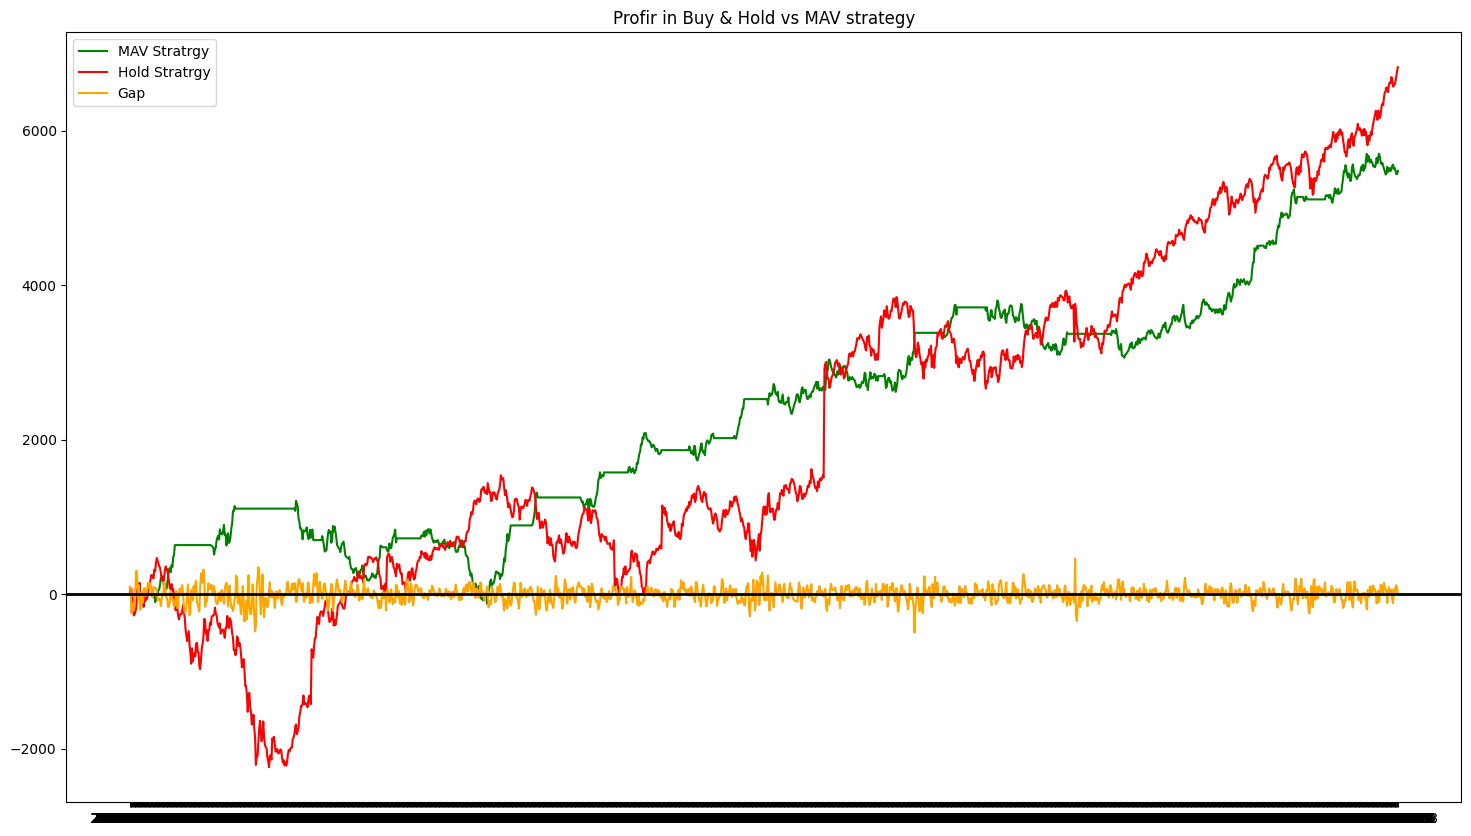

In [21]:
plt.figure(figsize=(18,10))
plt.title("Profir in Buy & Hold vs MAV strategy")
plt.plot(Data.Profit, c='g',label = 'MAV Stratrgy')
plt.plot(Data.NIFTY - Data.NIFTY[0], c='r', label = 'Hold Stratrgy')
plt.plot(Data.Gap , c = 'orange', label= 'Gap')
plt.plot
plt.axhline(y=0, c='k',lw=2)
plt.legend()
plt.show()

### Inferences

1. *MAV* is a **No-Loss** Strategy
1. The Difference occur due to chance in the *Opening Prices* of NIFTY

## Same Analysis 

Fast = 26 Days<br>
Slow = 200 Days

In [22]:
try :
    Data.drop(columns=['MA12','MA50'], inplace=True)
except :
    pass
mav(Data, 26)
mav(Data, 200)
Data.dropna(inplace=True)
Data.head()

,NIFTY,PriceDiff,Gap,Share,Profit,MA26,MA200
Date,,,,,,,
2009-03-24,2923.800049,-14.899902,131.449951,0,1107.652833,2755.163462,4046.703256
2009-03-25,2938.800049,-45.550049,60.550049,0,1107.652833,2755.601929,4037.415757
2009-03-26,2982.250000,-100.000000,143.449951,0,1107.652833,2758.882700,4027.978257
2009-03-27,3079.399902,-29.250000,126.399902,1,1078.402833,2763.926927,4019.031755
2009-03-30,3108.750000,130.600098,-101.250000,1,1209.002931,2773.730769,4011.456506


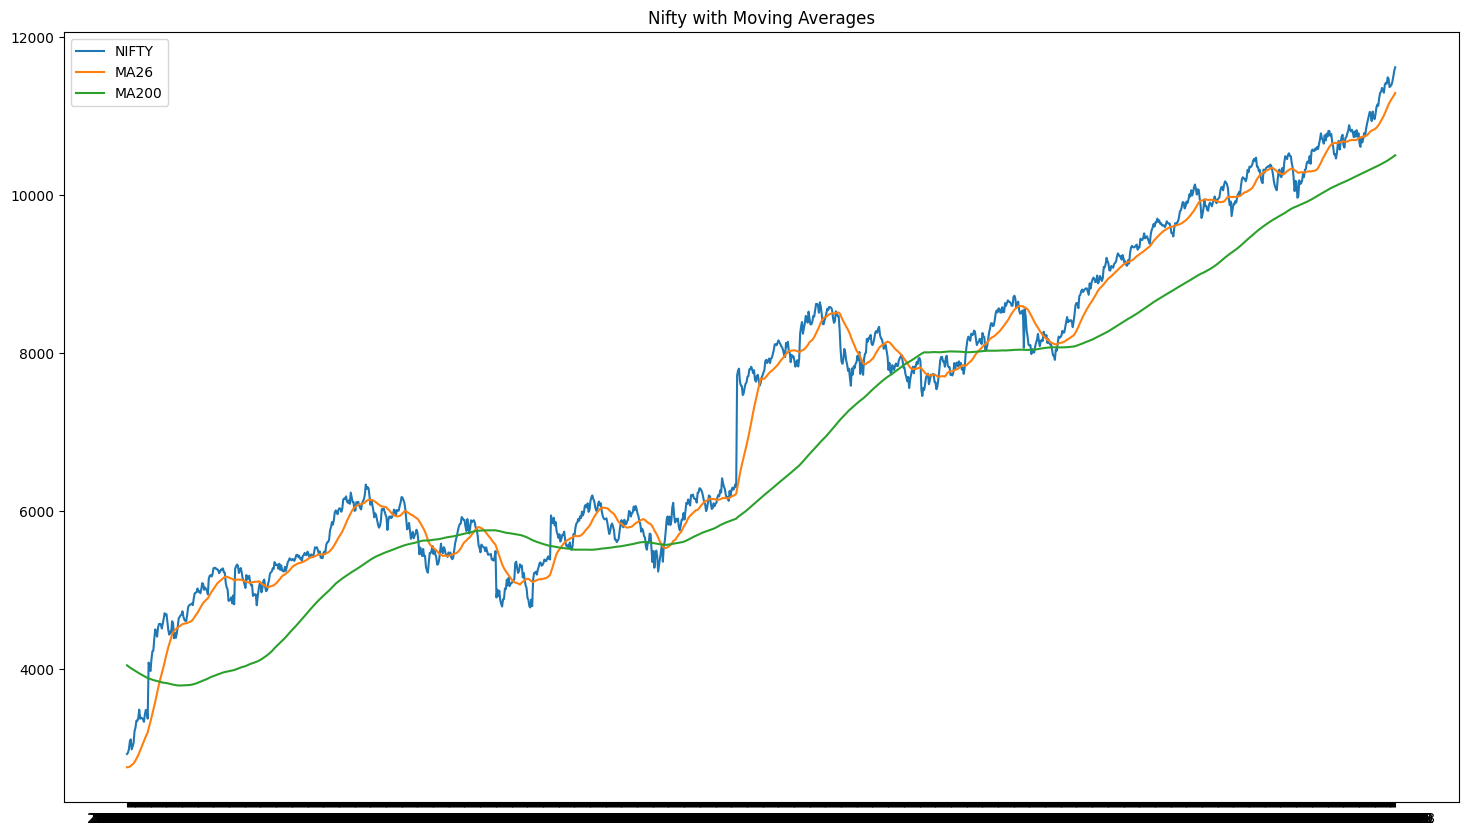

In [23]:
plt.figure(figsize=(18,10))
plt.title("Nifty with Moving Averages")
plt.plot(Data['NIFTY'], label = 'NIFTY')
plt.plot(Data['MA26'], label = 'MA26')
plt.plot(Data['MA200'], label = 'MA200')
plt.legend()
plt.show()

In [24]:
Data['Share'] = [1 if Data.loc[x,'MA26'] > Data.loc[x,'MA200'] else 0 for x in Data.index]
Data.sample(5)

,NIFTY,PriceDiff,Gap,Share,Profit,MA26,MA200
Date,,,,,,,
2018-07-09,10838.299805,-14.600586,108.750000,1,5583.503397,10753.876991,10300.798018
2013-08-07,5549.299805,30.199707,-145.799804,1,2526.104496,5874.921161,5606.440776
2010-09-24,5959.450195,-58.849610,27.250000,1,79.051275,5642.653790,5100.547485
2011-02-01,5537.299805,120.099610,-35.349610,1,1252.201663,5850.736497,5619.251230
2014-07-11,7584.100098,124.500000,-129.899902,1,3025.452154,6586.105825,5962.433254


In [25]:
Data['Profit'] = Data['Share'] * Data['PriceDiff']
Data['Profit'] = Data.Profit.cumsum()
Data.tail(10)

,NIFTY,PriceDiff,Gap,Share,Profit,MA26,MA200
Date,,,,,,,
2018-08-08,11412.500000,-37.500000,26.849609,1,5199.354951,11094.715482,10432.666035
2018-08-09,11493.250000,22.549805,58.200195,1,5221.904756,11124.648175,10440.326533
2018-08-10,11474.950195,45.450195,-63.750000,1,5267.354951,11151.144344,10448.337036
2018-08-13,11369.599609,13.849609,-119.200195,1,5281.204560,11175.200083,10456.624282
2018-08-14,11381.700195,-53.399414,65.500000,1,5227.805146,11196.100098,10464.754033
2018-08-16,11397.150391,12.100586,3.349610,1,5239.905732,11215.115497,10472.610537
2018-08-17,11437.150391,-33.599609,73.599609,1,5206.306123,11233.605882,10480.068540
2018-08-20,11502.099609,-49.650391,114.599609,1,5156.655732,11252.650090,10488.249287
2018-08-21,11576.200195,5.299804,68.800782,1,5161.955536,11272.623160,10496.809038


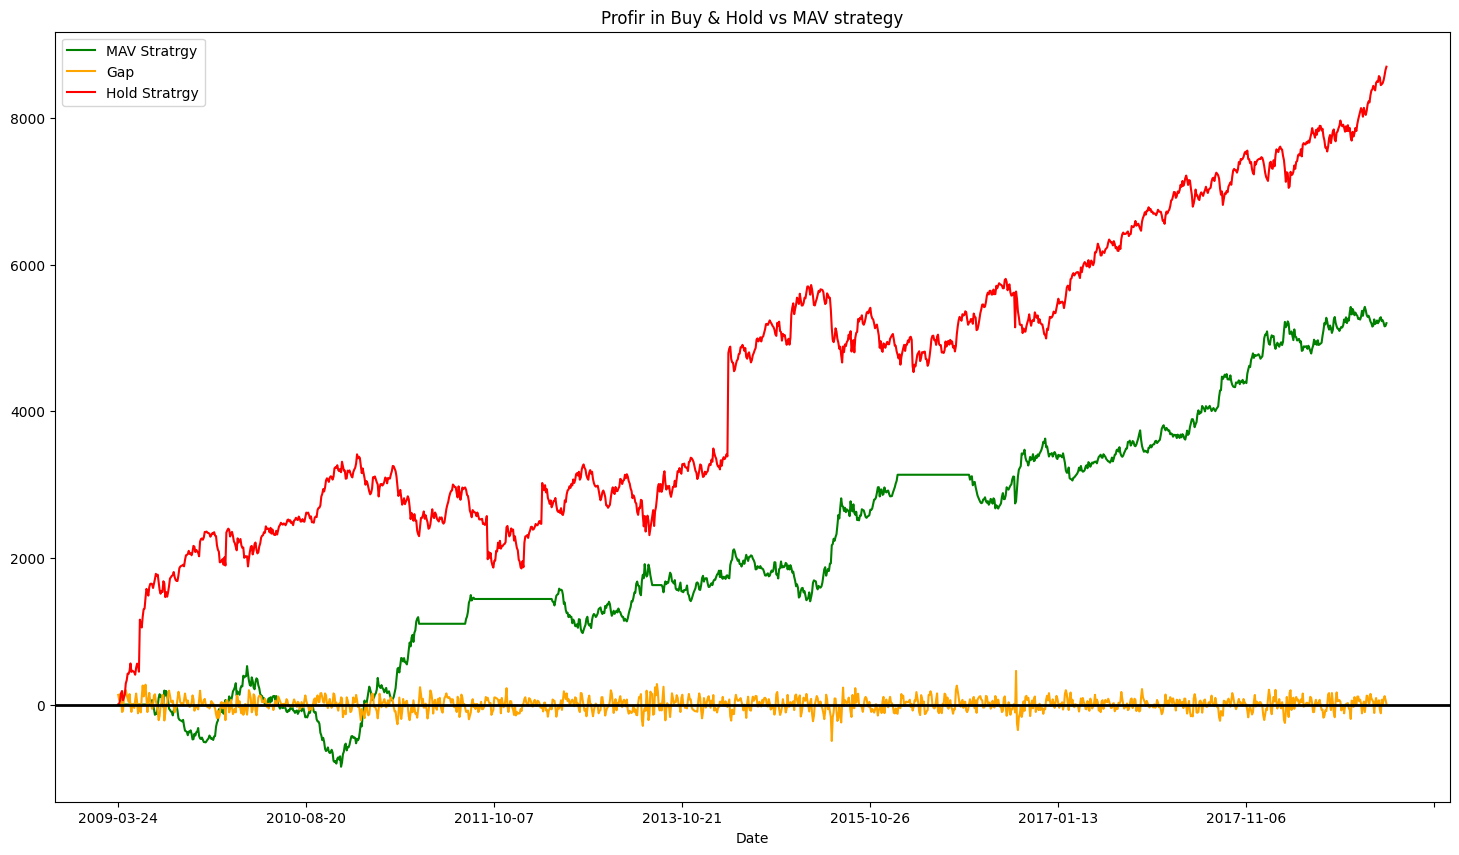

In [26]:
plt.figure(figsize=(18,10))
plt.title("Profir in Buy & Hold vs MAV strategy")
Data['Profit'].plot(c='g',label = 'MAV Stratrgy')
Data['Gap'].plot(c='orange',label = 'Gap')
plt.plot(Data.NIFTY - Data.NIFTY[0], c='r', label = 'Hold Stratrgy')
plt.plot
plt.axhline(y=0, c='k',lw=2)
plt.legend()
plt.show()